# K-Means Clustering 
## Tetra-Dataset

In [2]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.cm as cm

from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import numpy as np

In [3]:
data = loadmat("../data/tetra.mat")

X_tetra = data["data"]
Y_tetra = data["class"]

In [4]:
print("X:", X_tetra.shape, "\tY:", Y_tetra.shape)

X: (400, 3) 	Y: (400, 1)


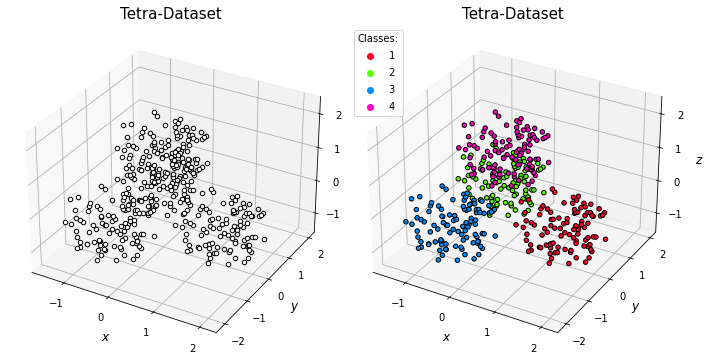

In [5]:
fig = plt.figure(figsize=(12, 10))

#### First Plot (left side) ####
ax = fig.add_subplot(1, 2, 1, projection="3d")

ax.scatter(X_tetra[:, 0], X_tetra[:, 1],
           zs=X_tetra[:, 2], c="white",
           edgecolor="k", depthshade=False)

ax.set_xlabel("$x$", size=12)
ax.set_ylabel("$y$", size=12)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_major_locator(MaxNLocator(4))
ax.zaxis.set_major_locator(MaxNLocator(4))
ax.set_title("Tetra-Dataset", size=15)

#### Second Plot (right side) ####
ax = fig.add_subplot(1, 2, 2, projection="3d")
scatter = ax.scatter(X_tetra[:, 0], X_tetra[:, 1],
                     zs=X_tetra[:, 2], c=Y_tetra,
                     edgecolor="k", depthshade=False,
                     cmap=cm.gist_rainbow)

ax.legend(*scatter.legend_elements(), 
          title="Classes:", loc="upper left")

ax.set_zlabel("$z$", size=12)
ax.set_xlabel("$x$", size=12)
ax.set_ylabel("$y$", size=12)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_major_locator(MaxNLocator(4))
ax.zaxis.set_major_locator(MaxNLocator(4))
ax.set_title("Tetra-Dataset", size=15)

plt.subplots_adjust(wspace=0.04)
#plt.savefig("tetra_data.pdf",dpi = 300, bbox_inches="tight")
plt.show()

In [6]:
# Principal Component Analysis (PCA)

pca = PCA(n_components=2)

X_tetra_low = pca.fit_transform(X_tetra)

In [7]:
X_tetra_low.shape

(400, 2)

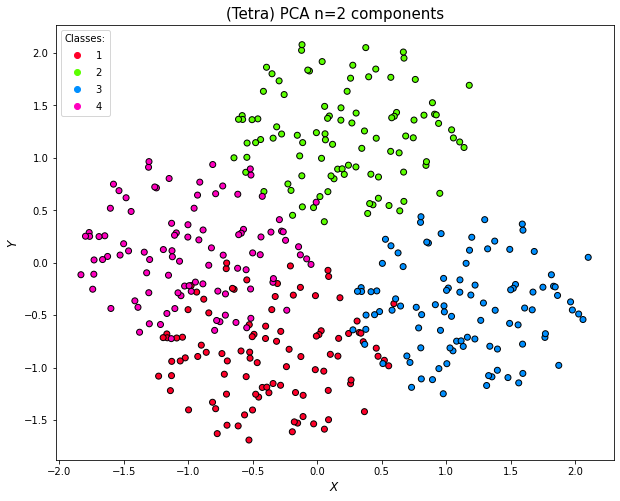

In [8]:
# Have a look at the PCA results

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tetra_low[:, 0], X_tetra_low[:, 1], 
                      c=Y_tetra, edgecolor="black",
                      cmap=cm.gist_rainbow)
plt.legend(*scatter.legend_elements(), 
           title="Classes:", loc="upper left")
plt.ylabel("$Y$", size=12)
plt.xlabel("$X$", size=12)
plt.title("(Tetra) PCA n=2 components", size=15)
#plt.savefig("tetra_pca.pdf", dpi = 300, bbox_inches="tight")
plt.show()

In [9]:
n = 4
kmeans = KMeans(n_clusters=n).fit(X_tetra)

In [10]:
centroids = kmeans.cluster_centers_
Y_kmean = kmeans.labels_
Y_kmean += 1

centroids.shape

(4, 3)

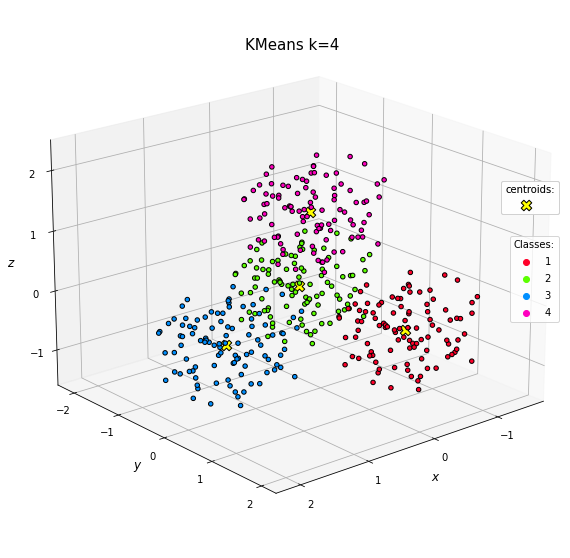

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d",elev=20, azim=50)

# Datapoints plot
scatter1 = ax.scatter(X_tetra[:, 0], X_tetra[:, 1],
                     zs=X_tetra[:, 2], c=Y_kmean,
                     edgecolor="k", depthshade=False,
                     cmap=cm.gist_rainbow)
# Datapoint legend
legend1 = ax.legend(*scatter1.legend_elements(),
                    title="Classes:", loc="right")
ax.add_artist(legend1)

# Centroids plot
scatter2 = ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2],
                      c="yellow", marker="X", s=110, edgecolor="k",
                      depthshade=False)

# Centroid legend
legend2 = ax.legend(["_",""], loc="right",
                    title="centroids:",
                    bbox_to_anchor=[1, 0.65])
ax.add_artist(legend2)

ax.set_zlabel("$z$", size=12)
ax.set_xlabel("$x$", size=12)
ax.set_ylabel("$y$", size=12)
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.xaxis.set_major_locator(MaxNLocator(4))
ax.zaxis.set_major_locator(MaxNLocator(4))
ax.set_title("KMeans k={}".format(n), size=15, y=0.99)

#plt.savefig("tetra_kmeans_3_2.pdf",dpi = 300, bbox_inches="tight")
plt.show()

In [12]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_tetra, Y_kmean)

cm

array([[  0,   0, 100,   0],
       [100,   0,   0,   0],
       [  0, 100,   0,   0],
       [  0,   0,   0, 100]])

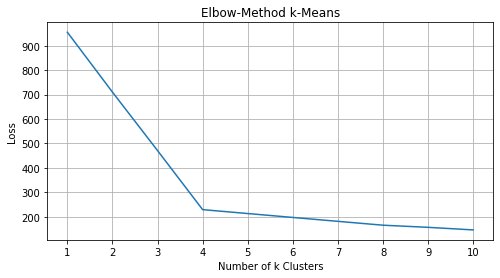

In [14]:
# Elbow method
loss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_tetra)
    loss.append(kmeans.inertia_)
    

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), loss)
plt.xticks(range(1, 11))
plt.xlabel("Number of k Clusters")
plt.title("Elbow-Method k-Means")
plt.ylabel("Loss")
plt.grid()
#plt.savefig("elbow-tetra.pdf", dpi = 300, bbox_inches="tight")
plt.show()
